In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. <br>
Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. <br>
Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df_login = pd.read_json('logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df_login.sort_values('login_time', inplace=True)
df_login.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [6]:
# Count
df_login['count'] = 1
df_login.head()

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [7]:
# Generate prelim data analysis of different granularity
login = df_login.set_index('login_time')
min15 = login.resample('15min').count()

In [8]:
min15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# Generate detailed daily data 
min_15 = min15.reset_index()
min15_mean = pd.DataFrame(min_15['login_time'].map(lambda d : d.time()))
min15_mean['count'] = min_15['count']
min15_mean = min15_mean.groupby('login_time').mean()
min15_median = min15_mean.groupby('login_time').median()

min_15.head()

<Figure size 864x504 with 0 Axes>

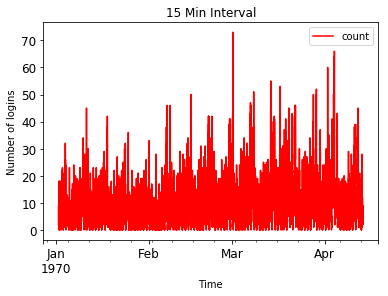

In [9]:
# Investigate patterns
plt.figure(figsize=(12,7))
min15.plot(color='r', title='15 Min Interval', fontsize=12)
plt.xlabel('Time')
plt.ylabel('Number of logins')
plt.show()

In [10]:
#dataframe with day of week
day_week = min15.reset_index()
day_week['dayofweek'] = day_week['login_time'].dt.dayofweek
day_week.set_index('login_time', inplace=True)

all_day = pd.DataFrame()
for i in range(7):

    day = day_week[day_week['dayofweek']==i]
    day = day.reset_index()
    d_day = pd.DataFrame(day['login_time'].apply(lambda i : i.time()))
    d_day['count'] = day['count']
    d_day = d_day.groupby('login_time').sum()
        
    all_day = pd.concat([all_day,d_day],axis=1)

In [11]:
all_day.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
all_day.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
login_time,,,,,,,
00:00:00,126,147,158,214,237,297,260
00:15:00,140,151,178,212,263,329,274
00:30:00,144,160,177,202,232,313,297
00:45:00,121,149,174,188,243,315,292
01:00:00,109,144,201,200,259,357,279


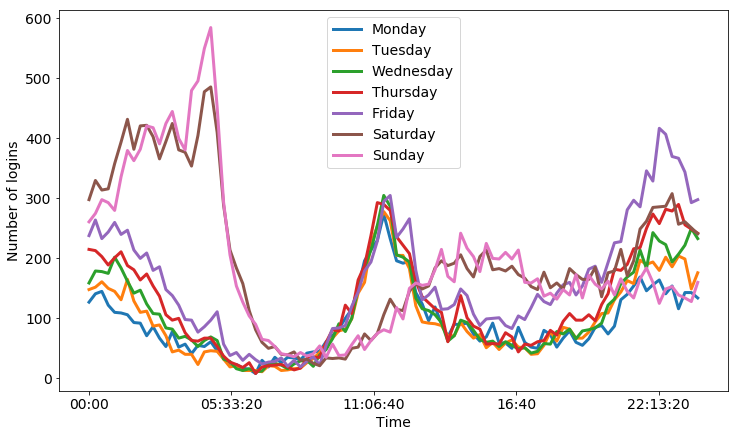

In [12]:
all_day.plot(fontsize=14,figsize=(12,7),linewidth=3)
plt.legend(loc=0)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Number of logins',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [13]:
all_day.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,91.906250,96.541667,107.697917,124.583333,158.416667,201.843750,189.239583
std,54.659535,65.664525,72.691434,82.319745,98.033900,121.546641,127.926850
min,7.000000,10.000000,10.000000,7.000000,18.000000,20.000000,34.000000
25%,52.000000,44.750000,55.500000,59.750000,87.000000,126.750000,113.500000
50%,80.500000,79.500000,82.000000,102.500000,138.500000,181.000000,158.000000
75%,127.000000,147.250000,169.500000,188.250000,229.000000,285.250000,218.000000
max,273.000000,277.000000,304.000000,292.000000,416.000000,485.000000,584.000000


**Important features of the daily demand:** <br>
- In weekday, the highest activity is seen at midday (lunch time) and late night (around 11pm). The lowest activity is in the morning (around 6 AM) and late afternoon time (5 PM).  
- During the weekend, demand is the highest in the very early morning (around 5 AM) and then drops off tremendously by midday. After that, it slowly increase with 2nd peak around 4 PM and creeps back up throughout the rest of the day.
- The highest of average demand is on Saturaday. It increases from Monday to Saturday, then decrease a little bit on Sunday.
- In term of maximum activity, it increases from Monday to Sunday (in a week, maximum demand is on Sunday).


# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**Answer:** <br> 
The change in number of toll reimbursement can be chosen as the metrics. Because this experiment is proposed to encourage more driver partner to go across cities. 

**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:** <br>

*Answer:* <br> A/B testing <br>

**a. how you will implement the experiment** <br>
*Answer:* <br>
It should create two group:
- Group A:  will not be given the reimbursement benefit
- Group B:  get the full benefit.

**b. what statistical test(s) you will conduct to verify the significance of the observation** <br>
*Answer:* <br>
Depending on the sample size, z-test or t-test could be used to verify the significance of the observation (the mean value of number of reimbursement between these two groups are different).

**c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.** <br>
*Answer:* <br>
The null hypothesis (Ho) is that mean value of two groups are no difference. <br>
The alternative hypothesis (Ha) is there are a difference between mean value of two group. <br>
Choose significane level (alpha = 0.05). <br>
- If p-value from test is smaller than 0.05, we can reject Ho and take Ha.
- If p-value from test is larger than 0.05, we can not reject Ho.

**Recommendation:** The sample size has to be big enough so that it may be considered as a representative of the population (cities)


# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [14]:
# Impoting data
with open("ultimate_data_challenge.json") as file:
    df = pd.DataFrame(json.load(file))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### There are null values (NaN) in data

In [16]:
# Fill NaN by mean
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df['phone'] = df['phone'].fillna('Others')

print(df['phone'].value_counts())

iPhone     34582
Android    15022
Others       396
Name: phone, dtype: int64


In [17]:
# Convert bollean to numerical values [0;1]
df['ultimate_black_user'] = df['ultimate_black_user'].apply(lambda x: 1 if x else 0)

In [18]:
# Making date time
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

# Adding active 
df['active'] = [1 if x > pd.Timestamp('2014-06-01') else 0 for x in df['last_trip_date']]

In [19]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [20]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.36620
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,0.48466,37.081503,0.48177
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.00000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.00000,66.700000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.00000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.00000


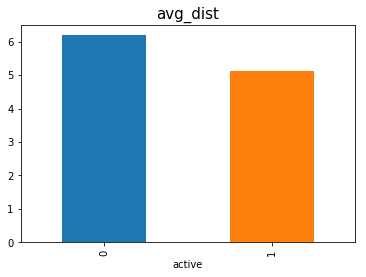

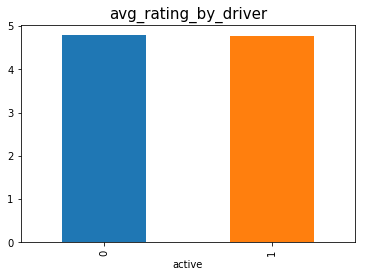

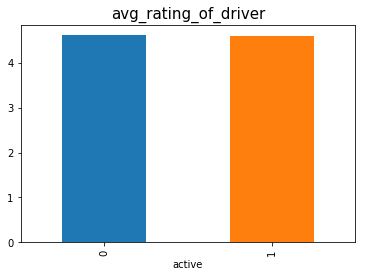

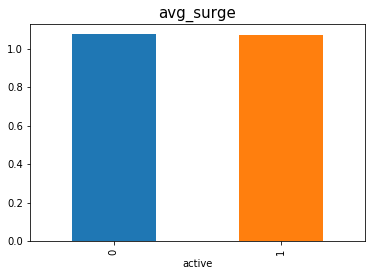

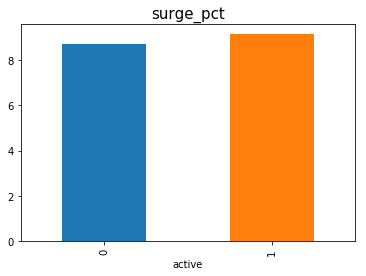

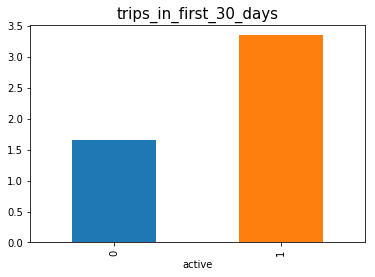

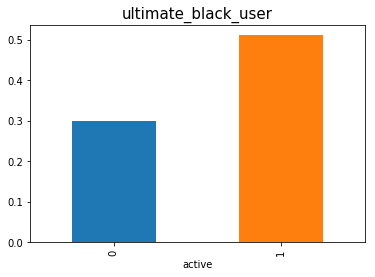

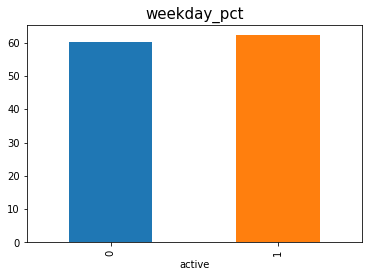

In [21]:
for i, column in enumerate(df.groupby('active').mean().columns):
    df.groupby('active').mean().iloc[:, i].plot(kind='bar')
    plt.title(column, fontsize=15)
    plt.show()

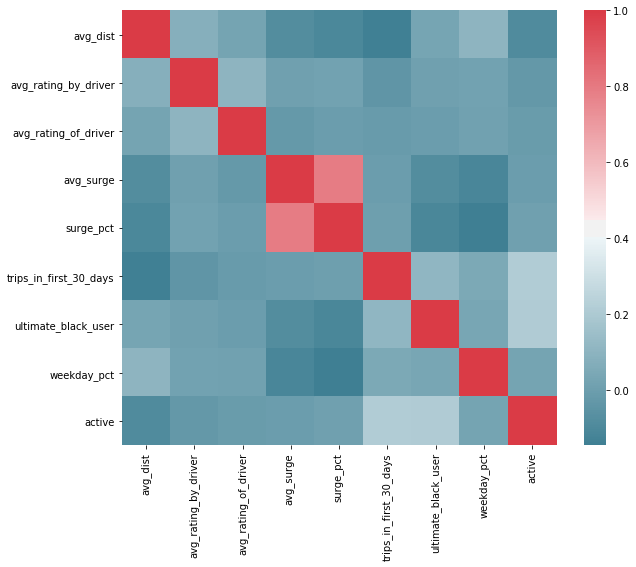

In [22]:
# Pearson corelation coefficients
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square = True)
plt.show()

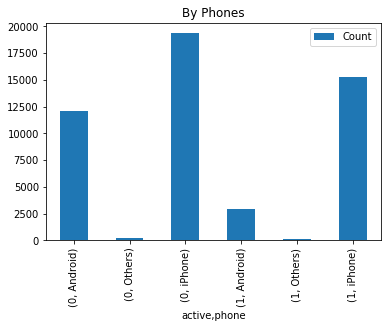

In [23]:
by_phone = df.groupby(['active', 'phone']).count()[['avg_dist']].rename(columns={'avg_dist':'Count'})
by_phone.plot(kind='bar')
plt.title('By Phones')
plt.show()

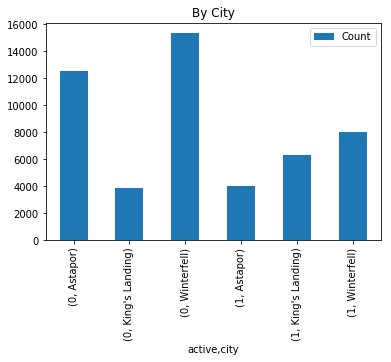

In [24]:
by_phone = df.groupby(['active', 'city']).count()[['avg_dist']].rename(columns={'avg_dist':'Count'})
by_phone.plot(kind='bar')
plt.title('By City')
plt.show()

### Figures show that there's a significant difference between active and non-active users for following features: 'city', 'phone', 'ultimate_black_user', 'trips_in_first_30_days', and 'avg dist'. 

## Feature importance

In [25]:
# Get dummy variables
from scipy import stats
def two_param_boxcox(data):
    data += 1
    data, _ = stats.boxcox(data)
    return data

data = pd.get_dummies(df.drop(['last_trip_date', 'signup_date'], axis=1), columns=['phone', 'city'])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,phone_Android,phone_Others,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,0,0,1,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,0,0,1,1,0,0
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,0,1,0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,1,0,0,0,0,1


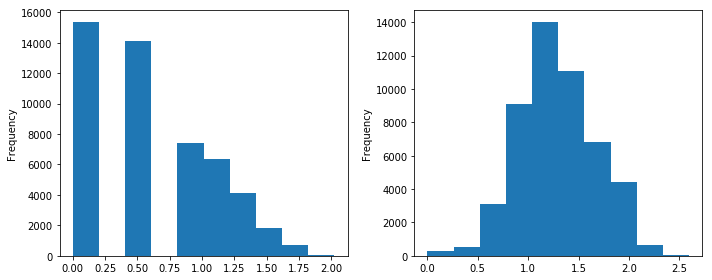

In [26]:
# Normalize the data distribution using boxcox transformation
data['avg_dist'] = two_param_boxcox(data['avg_dist'].values)
data['trips_in_first_30_days'] = two_param_boxcox(data['trips_in_first_30_days'].values)

plt.figure(figsize=(10, 4))
plt.subplot(121)
data['trips_in_first_30_days'].plot.hist()
plt.subplot(122)
data['avg_dist'].plot.hist()
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

y = data['active']
X = data.drop(['active'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
# Compare models using k-fold cross validation
kfold = StratifiedKFold(n_splits=3, random_state=1)

clfs = [SVC(), RandomForestClassifier(n_estimators=100)]
results = []

for clf in clfs:
    results += [cross_validate(estimator=clf, X=X_train, y=y_train, cv=kfold, scoring=scoring, return_train_score=False)]

In [29]:
results

[{'fit_time': array([14.86997676, 14.63261628, 14.49897528]),
  'score_time': array([14.85601497, 14.71738768, 14.80016494]),
  'test_accuracy': array([0.77526356, 0.77037799, 0.77335848]),
  'test_precision': array([0.71610507, 0.71393576, 0.72251454]),
  'test_recall': array([0.63490943, 0.61703129, 0.61373794]),
  'test_f1_score': array([0.67306733, 0.66195584, 0.6636988 ])},
 {'fit_time': array([1.28553987, 1.29451561, 1.30249429]),
  'score_time': array([0.69213724, 0.69911885, 0.69014311]),
  'test_accuracy': array([0.76480672, 0.75854976, 0.76538659]),
  'test_precision': array([0.68073879, 0.67521994, 0.68868395]),
  'test_recall': array([0.66760762, 0.64996471, 0.64996471]),
  'test_f1_score': array([0.67410926, 0.66235167, 0.66876437])}]

In [30]:
# feature importance
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
importances = clf.feature_importances_

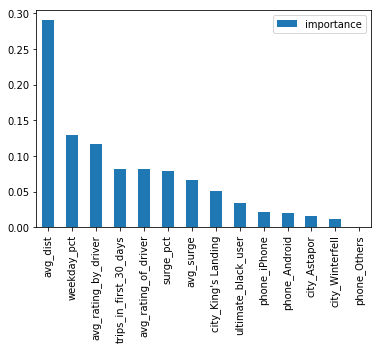

In [31]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')
plt.show()

In [32]:
# Optimize the model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100, 200], 'max_features':('auto', 'log2')}

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring=make_scorer(f1_score))
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': ('auto', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=0)

In [33]:
y_pred = clf.best_estimator_.predict(X_test) 
print('F1 score for the test set is {:.2f}.'.format(f1_score(y_test, y_pred)))

F1 score for the test set is 0.67.


**2. How valid is your model? Include any key indicators of model performance.**<br>
*Answer:* <br>
The model is valid as it has been tested with stratefied k-fold cross validation. 
F1 score was used to evaluate the model performace. Note that F1 score takes into account both precision and recall. 
It is equal to 0.67 for the test set by using random forest.

**3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice)** <br>
*Answer:* <br> 
The feature importance results from random forest regressor indicated that 'avg_dist' is the most important feature. So, the driver with lower average distance (in miles per trip) taken in the first 30 days after registration prefers to stay active longer. In other words, users who travel shorter distances tends to stay active. Therefore, the company should provide more promotion program for this type of users to expand the number of users. 